In [23]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('car_prices.csv') 

# 1. Handle Missing Values
df.dropna(inplace=True)

# 2. Extract the car manufacturer from 'CarName' if needed
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# 3. Drop unnecessary columns (like 'CarName', 'car_ID')
df.drop(['CarName', 'car_ID'], axis=1, inplace=True)

# 4. One-Hot Encode Categorical Columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Feature Scaling (Manual) - Min-Max scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

numerical_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                  'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                  'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df[numerical_cols] = df[numerical_cols].apply(min_max_scaling)

# Check for duplicates
if df.duplicated().any():
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True)

# Check for low-variance features
variance = df.var()
low_variance_cols = variance[variance < 1e-5].index.tolist()  # Columns with very low variance

if low_variance_cols:
    print(f"Removing low variance columns: {low_variance_cols}")
    df.drop(low_variance_cols, axis=1, inplace=True)

# 6. Ensure X and y are numeric
X = df.drop('price', axis=1).astype(float)
y = df['price'].astype(float)

# 7. Manual Train-Test Split (80% train, 20% test)
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 8. Add bias (intercept) manually
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# 9. Ridge Regression (Regularization)
def ridge_regression(X, y, alpha=1e-5):
    X_T_X = X.T.dot(X)
    X_T_X_inv = np.linalg.inv(X_T_X + alpha * np.eye(X_T_X.shape[0]))  # Regularization
    X_T_y = X.T.dot(y)
    theta = X_T_X_inv.dot(X_T_y)
    return theta

# Train the model using Ridge Regression
theta = ridge_regression(X_train, y_train, alpha=1e-5)

# 10. Make Predictions
y_pred_train = X_train.dot(theta)
y_pred_test = X_test.dot(theta)

# 11. Evaluation (Mean Squared Error - MSE)
mse_train = np.mean((y_pred_train - y_train)**2)
mse_test = np.mean((y_pred_test - y_test)**2)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

# Optional: Print predictions for the test set
print("Predicted prices on the test set: ", y_pred_test)


Training MSE: 0.0009563668608542231
Test MSE: 0.018321422422289044
Predicted prices on the test set:  [0.08314063 0.28094225 0.26762315 0.34968073 0.34923953 0.30060126
 0.36501232 0.31858003 0.38665912 0.13327774 0.17265834 0.12163677
 0.13787575 0.12648994 0.59523918 0.60016133 0.57155928 0.49469444
 0.09067661 0.10683385 0.0887409  0.10489814 0.11184699 0.11639749
 0.18928603 0.1326964  0.07870744 0.23585346 0.13587765 0.14654391
 0.30892974 0.32155977 0.31095643 0.32193197 0.332774   0.34430104
 0.35993428 0.4441932  0.23654737 0.50260223 0.38339739]


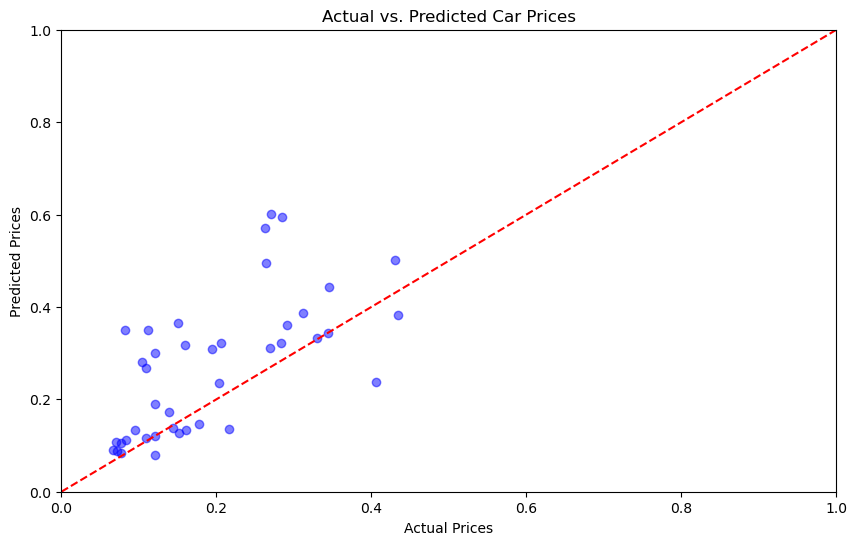

In [25]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.xlim(0, 1)  # Adjust based on your actual price range
plt.ylim(0, 1)  # Adjust based on your predicted price range
plt.show()


In [45]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('car_prices.csv')

# Extract the car company from CarName (preprocessing step)
data['CarCompany'] = data['CarName'].apply(lambda x: x.split()[0])

# Drop irrelevant or non-numeric columns for correlation analysis
data_numeric = data.drop(columns=['CarName', 'car_ID', 'CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'cylindernumber'])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr().abs()

# Set the threshold for high correlation
threshold = 0.9

# Find pairs of highly correlated features
high_corr_pairs = np.where(corr_matrix > threshold)

# Filter out self-correlations
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs (correlation > 0.9):")
print(high_corr_pairs)


Highly correlated pairs (correlation > 0.9):
[('citympg', 'highwaympg')]


In [47]:
# List of features to drop based on high correlation
features_to_drop = []

for pair in high_corr_pairs:
    features_to_drop.append(pair[1])  # Arbitrarily drop the second feature of each pair

# Drop the features
data_cleaned = data_numeric.drop(columns=features_to_drop)

print("Remaining features after removing collinear features:")
print(data_cleaned.columns)


Remaining features after removing collinear features:
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')


In [49]:
# Define the feature matrix X and the target variable y
X = data_cleaned.drop(columns=['price'])  # Remove the target 'price'
y = data_cleaned['price']

# Add a column of ones for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Ensure X and y are numpy arrays
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Train the model using the normal equation
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_equation(X, y)
print("Model parameters:", theta)


Model parameters: [-5.06214137e+04  3.03732467e+02  1.46972119e+02 -8.17561602e+01
  4.75167548e+02  1.97804937e+02  1.37181764e+00  1.15207152e+02
 -9.39755519e+02 -2.95408517e+03  2.89238463e+02  3.65490589e+01
  2.30087010e+00 -9.89749016e+01]


In [53]:
import numpy as np

# Example shape checks
print(f"X_train shape: {X_train.shape}")  # (n_samples, n_features)
print(f"Theta shape: {theta.shape}")      # (n_features,)

# Make predictions on the training set
if X_train.shape[1] == theta.shape[0]:
    y_train_pred = X_train.dot(theta)
else:
    print("Shape mismatch: Ensure the number of features in X_train matches the length of theta.")
    # You can inspect or modify X_train and theta here if needed

# Calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate R-squared (R²)
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Only proceed if shapes are correct
if X_train.shape[1] == theta.shape[0]:
    # Calculate MSE and R-squared
    mse_train = calculate_mse(y_train, y_train_pred)
    r2_train = calculate_r2(y_train, y_train_pred)

    print(f"Training MSE: {mse_train}")
    print(f"Training R²: {r2_train}")


X_train shape: (164, 71)
Theta shape: (14,)
Shape mismatch: Ensure the number of features in X_train matches the length of theta.
